In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import re

import seaborn as sns
sns.set(style="whitegrid")

import matplotlib.pyplot as plt

In [2]:
females = pd.read_csv('../data/MA_Exer_PikesPeak_Females.txt', sep='\t')
males = pd.read_csv('../data/MA_Exer_PikesPeak_Males.txt', sep='\t', encoding='latin-1')

In [3]:
females.head()

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace
0,1,1/86,30,Florence Jepkosgei,22.0,Kenya .,32:59,32:58#,5:19
1,2,2/86,8,Eunice Chepkirui,21.0,Kenya .,33:14,33:13#,5:21
2,3,1/247,3200,Elena Orlova,36.0,Gaithersburg MD,34:26,34:25#,5:33
3,4,1/173,2,Susannah Kvasnicka,34.0,Great Falls VA,34:43,34:42#,5:35
4,5,1/142,6,Casey Smith,26.0,Arlington VA,35:04,35:02,5:39


In [4]:
females['sex'] = 0
males['sex'] = 1

In [5]:
both = pd.merge(males, females, how='outer')

In [6]:
both.head()

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,sex
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38,1
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42,1
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46,1
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48,1
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55,1


In [7]:
# Need to make Net Tim numeric. However, we don't know what units samples lile 1.10.10
# Are in. This is a question to ask stakeholders. For now, going under assumption they are minute, second,\
# millisecond and dropping millisecond. Also assuming dropping milisecond is ok :)
results = []
nots = []
for i in both['Net Tim'].tolist():
    
    try:
        i = i.replace('#','')
        i = i.replace('*','')
        i = i.replace(':','.')
        results.append(float(i))
        
    except:
       
        minutes, secs = i[2:].split('.')
        minutes = minutes.replace('0', '')
        
        if minutes:
            
            results.append(float(60 + int(minutes) + float(secs)))
        
        else:
            results.append(float(60 + int(0) + float(secs)))
           
            
        #results.append(float(i[0:4]) )
        #nots.append(secs)

In [8]:
both['Net Time Fixed'] = results

In [9]:
both.head()

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,sex,Net Time Fixed
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38,1,28.47
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42,1,29.10
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46,1,29.37
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48,1,29.46
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55,1,30.30


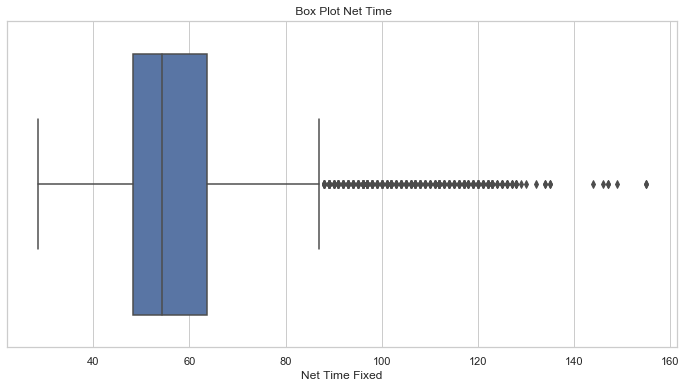

In [16]:
dims = (12, 6)
fig, axs = plt.subplots(figsize=dims)
ax = sns.boxplot(x=both["Net Time Fixed"])
ax.set_title(" Box Plot Net Time")
plt.savefig("../charts/bp_net.png")

In [17]:
def get_stats(data):
    return np.mean(data), np.median(data), stats.mode(data)[1].tolist()[0], max(data) - min(data)

In [18]:
male_stats = get_stats(both['Net Time Fixed'][both['sex'] == 1]) 
female_stats = get_stats(both['Net Time Fixed'][both['sex'] == 0]) 

In [19]:
stats_both = male_stats + female_stats

In [20]:
sexes = ['male','male','male','male','female','female','female','female']
labels = ['mean', 'median', 'mode', 'range', 'mean', 'median', 'mode', 'range']

In [21]:
dic = {'stats': stats_both, 'sex':sexes, 'labels':labels}


In [22]:
stats_df = pd.DataFrame(dic)

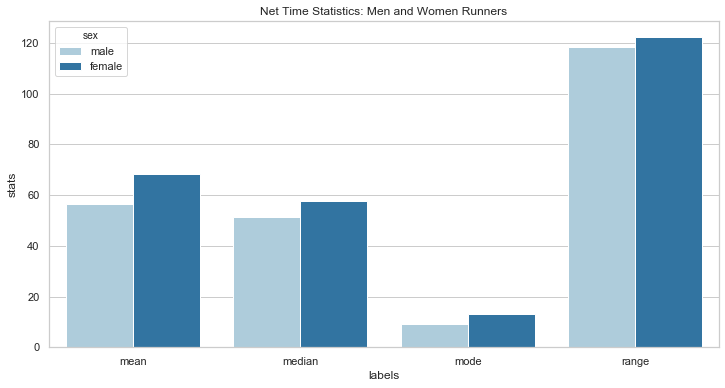

In [23]:
with sns.color_palette("Paired"):
    dims = (12, 6)
    fig, axs = plt.subplots(figsize=dims)
    ax = sns.barplot(x="labels", y="stats", hue="sex", data=stats_df)

    ax.set_title("Net Time Statistics: Men and Women Runners")
    plt.savefig("../charts/stats_men_vs_women.png")
    plt.show(ax);

In [24]:
results = []

for i in both['Gun Tim'].tolist():
    
    try:
        i = i.replace('#','')
        i = i.replace('*','')
        i = i.replace(':','.')
        results.append(float(i))
        
    except:
        
        try:
 
            results.append(float(i[0:4]) )
            #print(i[4:])
        except:
            results.append(float(i[4:]))
       

In [25]:
results = []
other = []
for i in both['Gun Tim'].tolist():
    try:
        i = i.replace('#','')
        i = i.replace('*','')
        i = i.replace(':','.')
        results.append(float(i))
        
    except:
        try:
            minutes, secs = i[2:].split('.')
            minutes = minutes.replace('0', '')
        
            if minutes:
             
                results.append(float(60 + int(minutes) + float(secs)))
        
            else:
                results.append(float(60 + int(0) + float(secs)))
        except:
            i = i.replace('D', '').lstrip()
            i = i.replace('M', '').lstrip()
            i = i.replace('V', '').lstrip()
            i = i.replace('N', '').lstrip()
            
      
            minutes, secs = i[2:].split('.')
            minutes = minutes.replace('0', '')
        
            if minutes:
             
                results.append(float(60 + int(minutes) + float(secs)))
        
            else:
                results.append(float(60 + int(0) + float(secs)))
        

In [26]:
both['Gun Tim Fixed'] = results

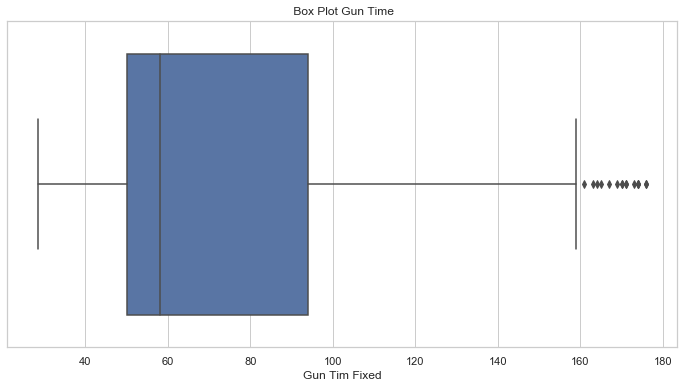

In [28]:
dims = (12, 6)
fig, axs = plt.subplots(figsize=dims)
ax = sns.boxplot(x=both["Gun Tim Fixed"])
ax.set_title(" Box Plot Gun Time")
plt.savefig("../charts/bp_gun.png")

In [29]:
both['GT - NT'] = both['Gun Tim Fixed'] - both['Net Time Fixed']

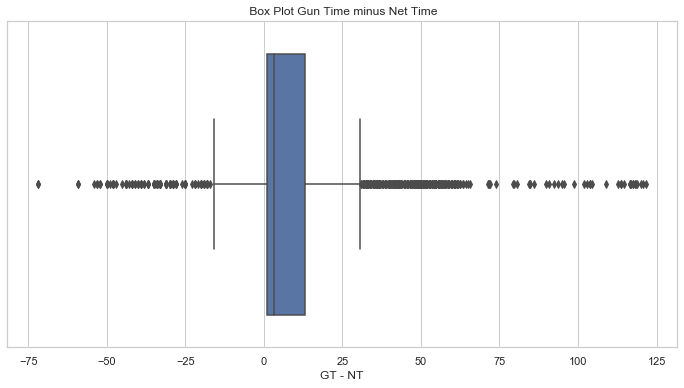

In [38]:
dims = (12, 6)
fig, axs = plt.subplots(figsize=dims)
ax = sns.boxplot(x=both["GT - NT"])
ax.set_title(" Box Plot Gun Time minus Net Time")
plt.savefig("../charts/bp_g_minus_t.png")

In [39]:
both.head()

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,sex,Net Time Fixed,Gun Tim Fixed,GT - NT
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38,1,28.47,28.48,0.01
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42,1,29.10,29.11,0.01
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46,1,29.37,29.38,0.01
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48,1,29.46,29.46,0.00
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55,1,30.30,30.31,0.01


In [40]:
nt_stats = get_stats(both['Net Time Fixed']) 
gt_stats = get_stats(both['Gun Tim Fixed']) 

In [41]:
stats_both = nt_stats + gt_stats

In [42]:
times = ["nt","nt","nt","nt","gt","gt","gt","gt"]

In [43]:
labels = ['mean', 'median', 'mode', 'range', 'mean', 'median', 'mode', 'range']

In [44]:
dic = {'stats': stats_both, 'time':times, 'labels':labels}

In [45]:
stats_df = pd.DataFrame(dic)

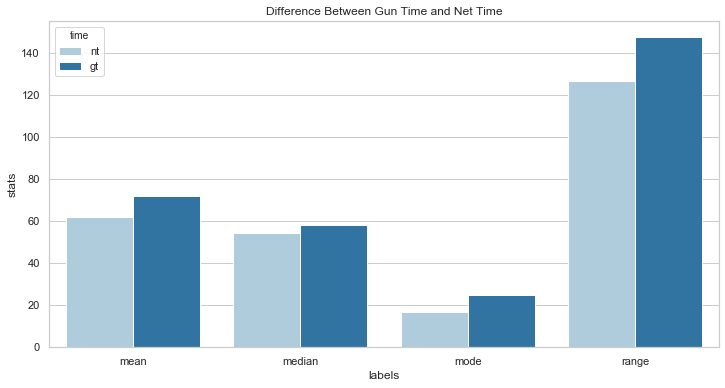

In [46]:
with sns.color_palette("Paired"):
    dims = (12, 6)
    fig, axs = plt.subplots(figsize=dims)
    ax = sns.barplot(x="labels", y="stats", hue="time", data=stats_df)

    ax.set_title("Difference Between Gun Time and Net Time")
    plt.savefig("../charts/gt_vs_nt.png")
    plt.show(ax);

In [47]:
gt_minus_nt_stats = get_stats(both['GT - NT']) 

In [48]:
gt_minus_nt_stats

(9.52978902953587, 3.1799999999999997, 37, 193.75)

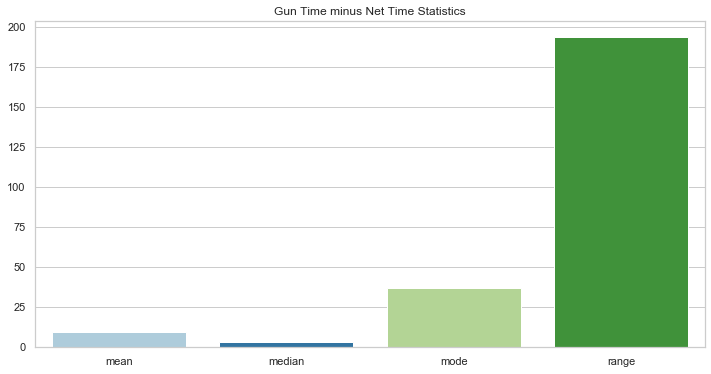

In [49]:
with sns.color_palette("Paired"):
    dims = (12, 6)
    fig, axs = plt.subplots(figsize=dims)
    ax = sns.barplot(x=['mean','median', 'mode', 'range'], y=gt_minus_nt_stats)

    ax.set_title("Gun Time minus Net Time Statistics")
    plt.savefig("../charts/gt_minus_nt.png")
    plt.show(ax);

In [50]:

divs = []
tots = []
other = []
for dt in both['Div/Tot']:
    
    try:
        div, tot = str(dt).split('/')
    
        divs.append(div)
        tots.append(tot)
        
    except:
        divs.append(dt)
        tots.append(dt)

In [51]:
both['div'] = divs
both['tot'] = tots

In [52]:
both.head()

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,sex,Net Time Fixed,Gun Tim Fixed,GT - NT,div,tot
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38,1,28.47,28.48,0.01,1,48
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42,1,29.10,29.11,0.01,2,48
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46,1,29.37,29.38,0.01,3,48
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48,1,29.46,29.46,0.00,1,96
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55,1,30.30,30.31,0.01,4,48


In [53]:
both[both['Name'] == "Chris Doe"]

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,sex,Net Time Fixed,Gun Tim Fixed,GT - NT,div,tot
534,535,108/214,2869,Chris Doe,44.0,Reson VA,53:07,49:43,8:00,1,49.43,53.07,3.64,108,214


In [54]:
percentiles = np.percentile(both['Net Time Fixed'][both['div'] == '108'], 
                            [10,20,30,40,50,60,70,80,90])

In [55]:
perc_list = list(percentiles).reverse()

In [56]:
percentiles

array([51.86 , 52.282, 54.427, 56.428, 58.105, 59.226, 67.743, 88.2  ,
       93.7  ])

In [57]:
labels = ['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th']

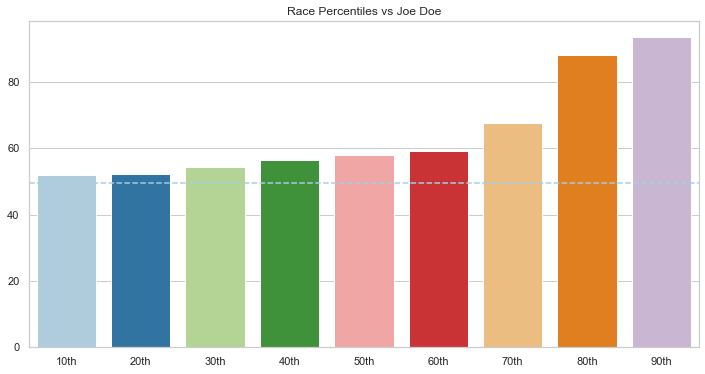

In [58]:
with sns.color_palette("Paired"):
    dims = (12, 6)
    fig, axs = plt.subplots(figsize=dims)
    ax = sns.barplot(x=labels, y=percentiles.tolist())
    #ax1 = ax.axes[0]

    ax.axhline(49.43, ls='--')
    ax.set_title("Race Percentiles vs Joe Doe")
    plt.savefig("../charts/joe_doe.png")
    plt.show(ax);

In [59]:
#If we compare Joe to the top of the 90th percentile:
print("Joe is {} seconds below the top 10% of racers!".format(round(51.86-49.43, 2)))

Joe is 2.43 seconds below the top 10% of racers!


In [60]:
race_means = both[['div', 'Net Time Fixed']].groupby(['div']).mean()


In [61]:
race_means['div'] =  race_means.index

In [62]:
race_means.sort_values(by='Net Time Fixed', inplace=True, ascending=True)

In [63]:
race_means.head()

,Net Time Fixed,div
div,,
1,41.832500,1
4,43.632800,4
2,43.862500,2
7,43.894783,7
8,44.576957,8


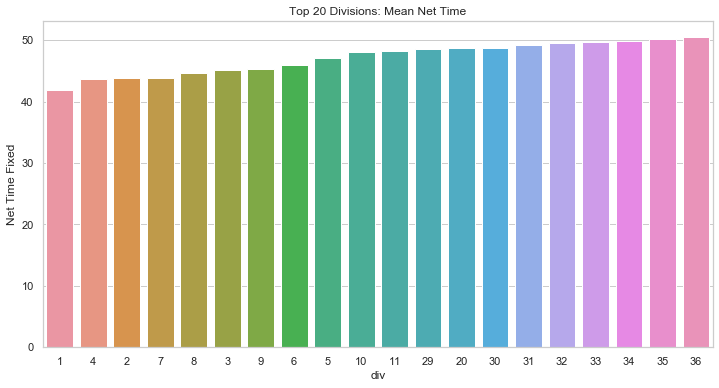

In [64]:
with sns.color_palette("Paired"):
    dims = (12, 6)
    fig, axs = plt.subplots(figsize=dims)
    ax = sns.barplot(x=race_means['div'].iloc[0:20], 
                     y=race_means['Net Time Fixed'].iloc[0:20],
                    order=race_means.index[0:20])

    ax.set_title("Top 20 Divisions: Mean Net Time")
    plt.savefig("../charts/div_mean.png")
    plt.show(ax);